/home/bogrum/miniforge3/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


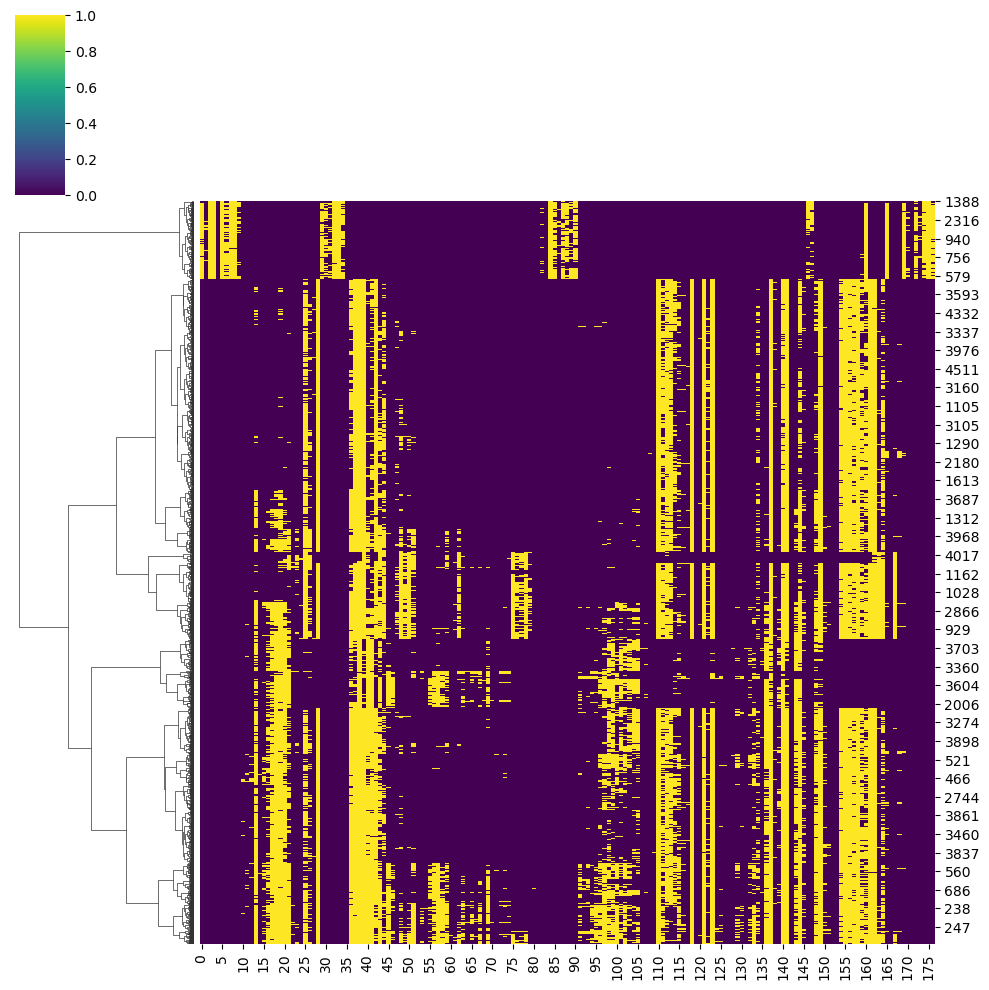

In [1]:
import pandas as pd
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import MultiLabelBinarizer
import plotly.graph_objs as go
import numpy as np
from config import processed_dir

csv_file_dir = f"{processed_dir}/pockets.csv"

# Step 1: Read the CSV file
data = pd.read_csv(csv_file_dir)

residues = data['residues'].str.split()  # Split string of residues into lists
mlb = MultiLabelBinarizer()
residues_encoded = mlb.fit_transform(residues)

# Calculate hierarchical clustering
linkage = hierarchy.linkage(residues_encoded, method='ward')

# Create seaborn clustermap
clustermap = sns.clustermap(residues_encoded, method='ward', cmap='viridis', row_cluster=True, col_cluster=False)

# Extract reordered matrix from the clustermap
reordered_matrix = clustermap.data2d

# Convert seaborn clustermap to Plotly heatmap
fig = go.Figure(data=go.Heatmap(z=reordered_matrix, colorscale='Viridis'))

# Update layout to include title and axes labels
fig.update_layout(
    title='Interactive Heatmap with Clustering',
    xaxis=dict(title='Residues'),
    yaxis=dict(title='Clusters')
)

# Step 2: Export the Plotly figure to an HTML file
fig.write_html('./web/clustermap.html', auto_open=False)


In [2]:
"""import redis

redis_client = redis.StrictRedis(host='localhost', port=6379, db=0)
pubsub = redis_client.pubsub()
pubsub.subscribe('slider_value')

for message in pubsub.listen():
    if message['type'] == 'message':
        value = message['data'].decode('utf-8')
        print(f"Received slider value: {value}")
        # Process the received slider value here
        # Call your function or perform any desired operations with the value
"""

'import redis\n\nredis_client = redis.StrictRedis(host=\'localhost\', port=6379, db=0)\npubsub = redis_client.pubsub()\npubsub.subscribe(\'slider_value\')\n\nfor message in pubsub.listen():\n    if message[\'type\'] == \'message\':\n        value = message[\'data\'].decode(\'utf-8\')\n        print(f"Received slider value: {value}")\n        # Process the received slider value here\n        # Call your function or perform any desired operations with the value\n'

In [3]:
file = open('depth.txt', 'r')
depth = file.read()
depth = int(depth)

print(depth)

cutree = hierarchy.cut_tree(linkage, n_clusters=depth)

3


In [4]:
# Function to calculate Euclidean distance
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q)**2))

In [5]:

# Get representatives from each cluster at the chosen depth
representatives = []

for cluster_id in range(depth):
    indices = [i for i, c in enumerate(cutree) if c[0] == cluster_id]
    if indices:
        cluster_points = residues_encoded[indices]
        #print(cluster_points)
        centroid = np.mean(cluster_points, axis=0)  # Calculate centroid/mean of the cluster
        # Find euclidean distance of each cluster point to the centroid
        distances = [euclidean_distance(centroid, point) for point in cluster_points]
        # Find the point closest to the centroid
        representative_index = np.argmin(distances)
        representative = cluster_points[representative_index]
        # Find the row in the original data frame that has this representative_index
        representative_pockets = data.iloc[indices[representative_index]]
        # File the representative pocket and the cluster it belongs to
        representatives.append((cluster_id, representative_pockets))

        print(representative_pockets[4], type(representative_pockets))


for rep in representatives:
    print(f"Cluster {rep[0]}:")
    print(rep[1])


 X_1032 X_1035 X_1044 X_1045 X_1046 X_1047 X_1050 X_1052 X_840 X_841 X_842 X_843 X_848 X_866 X_868 X_885 X_888 X_889 X_892 X_899 X_914 X_916 X_917 X_918 X_919 X_920 X_921 X_922 X_923 X_926 <class 'pandas.core.series.Series'>
 X_1019 X_1024 X_1025 X_1026 X_1027 X_1028 X_1032 X_1035 X_1044 X_1045 X_1046 X_1047 X_1048 X_1049 X_1050 X_1051 X_813 X_814 X_819 X_820 X_840 X_841 X_842 X_843 X_848 X_866 X_868 X_884 X_885 X_888 X_889 X_891 X_892 X_898 X_899 X_914 X_916 X_917 X_918 X_919 X_920 X_921 X_922 X_923 <class 'pandas.core.series.Series'>
 X_1000 X_1003 X_1004 X_1007 X_1008 X_1010 X_1011 X_1036 X_1037 X_1039 X_1040 X_1041 X_1164 X_1165 X_1168 X_1169 X_1171 X_921 X_927 X_931 X_939 X_997 X_998 X_999 <class 'pandas.core.series.Series'>
Cluster 0:
File name                                           2IXR_traj_854
Frame                                                         854
pocket_index                                                    1
probability                                        

/tmp/ipykernel_2607/3618553090.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [6]:
"""with open("most_similar.txt","w") as file:
    for rep in representatives:
        file.write(str(rep[1]) + "\n")"""

'with open("most_similar.txt","w") as file:\n    for rep in representatives:\n        file.write(str(rep[1]) + "\n")'

In [7]:
import pandas as pd

file_path = "/home/bogrum/ens_dock_tool/most_similar.txt"


# Clean the contents of the text file by opening it in write mode
with open(file_path, "w") as file:
    pass 

for rep in representatives:
    # Write the Series to a text file using the to_csv() method in append mode
    rep[1].to_csv(file_path, mode='a', index=True, header=False)
    



In [17]:
# Step 1: Calculate Total Mass of Conformations
total_conformations = sum(len(indices) for cluster_id, representative_pockets in representatives for indices in [[i for i, c in enumerate(cutree) if c[0] == cluster_id]])

# Initialize a dictionary to store cluster IDs and their corresponding mass percentages
cluster_mass_percentages = {}

# Step 2: Calculate Mass for Each Cluster
for cluster_id, representative_pockets in representatives:
    indices = [i for i, c in enumerate(cutree) if c[0] == cluster_id]
    if indices:
        conformations_count = len(indices)  # Count the number of conformations in this cluster
        mass_percentage = (conformations_count / total_conformations) * 100  # Calculate percentage mass
        cluster_mass_percentages[cluster_id] = mass_percentage
        
f = open("conformations_count.txt","w")
# Step 3: Print the Mass Percentages for Each Cluster
for cluster_id, percentage in cluster_mass_percentages.items():
    print(f"Cluster {cluster_id}: {percentage:.2f}% mass")
    f.writelines(f"Cluster {cluster_id}: {percentage:.2f}% mass \n")

# Now you have a dictionary `cluster_mass_percentages` containing the cluster ID as key and the percentage mass represented by that cluster as the value.
# Each percentage indicates the proportion of total conformations (mass) that the cluster represents.
f = open("conformations_count.txt","w")


Cluster 0: 48.49% mass
Cluster 1: 41.03% mass
Cluster 2: 10.48% mass
